In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_path = './car.jpg'

In [3]:
orig_img = cv2.imread(img_path)

In [4]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15, 15])
    axis1 = fig.add_subplot(121)
    axis1.imshow(img1, cmap="gray")
    axis1.set(xticks=[], yticks=[], title=title1)
    axis2 = fig.add_subplot(122)
    axis2.imshow(img2, cmap="gray")
    axis2.set(xticks=[], yticks=[], title=title2)
    

In [5]:
gray_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)

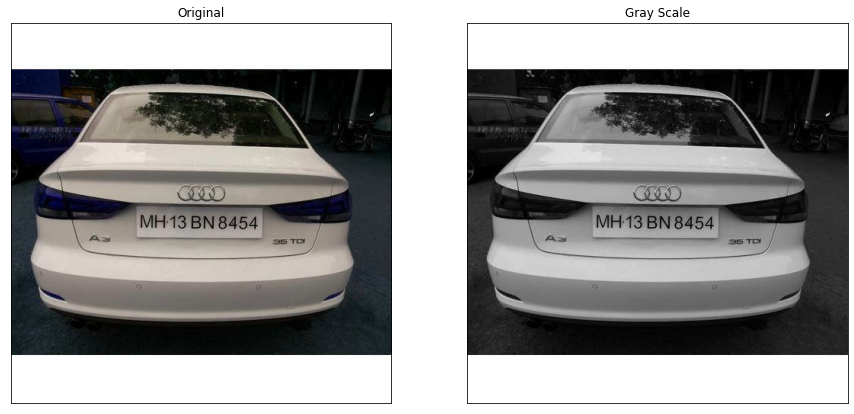

In [6]:
plot_images(orig_img, gray_img, "Original", "Gray Scale")

In [7]:
blur_img = cv2.bilateralFilter(gray_img, 7, 21, 56)

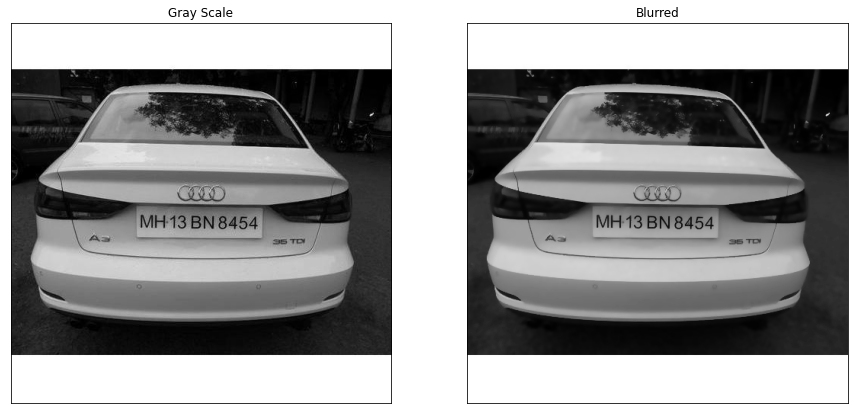

In [8]:
plot_images(gray_img, blur_img, "Gray Scale", "Blurred")

In [9]:
edge_img = cv2.Canny(blur_img, 60, 300)

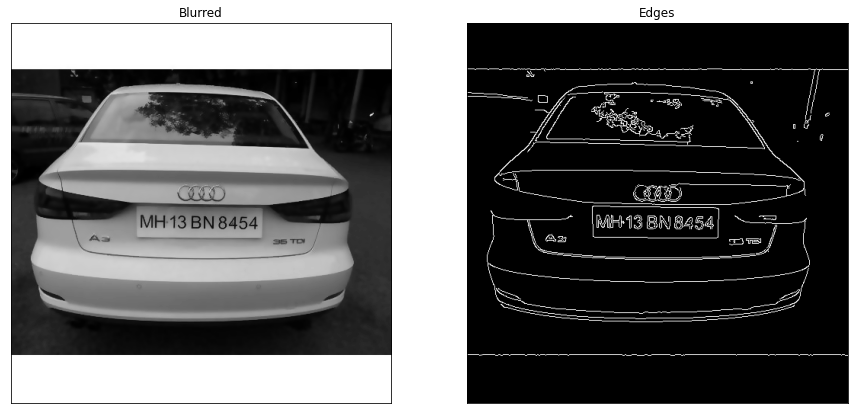

In [10]:
plot_images(blur_img, edge_img, "Blurred", "Edges")

In [11]:
edges, new_data = cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
contour_img = cv2.drawContours(orig_img.copy(), edges, -1, (0, 255, 255), 3)

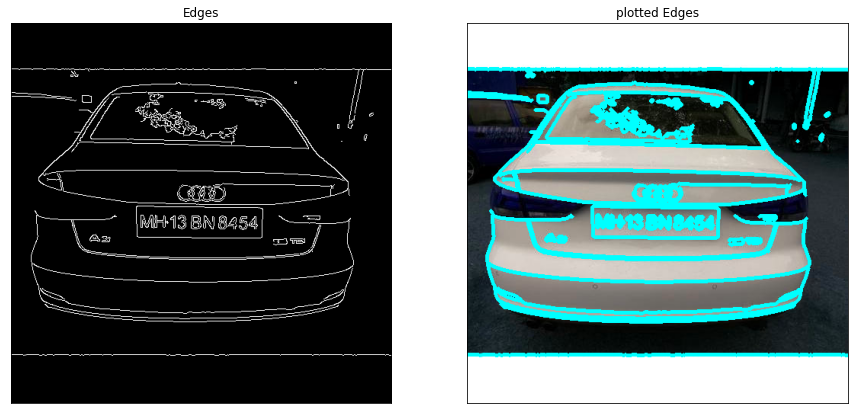

In [13]:
plot_images(edge_img, contour_img, "Edges", "plotted Edges")

In [14]:
sorted_edges = sorted(edges, key = cv2.contourArea, reverse = True)[:10]

In [15]:
sorted_contour_img = cv2.drawContours(orig_img.copy(), sorted_edges, -1, (0, 255, 255), 4)

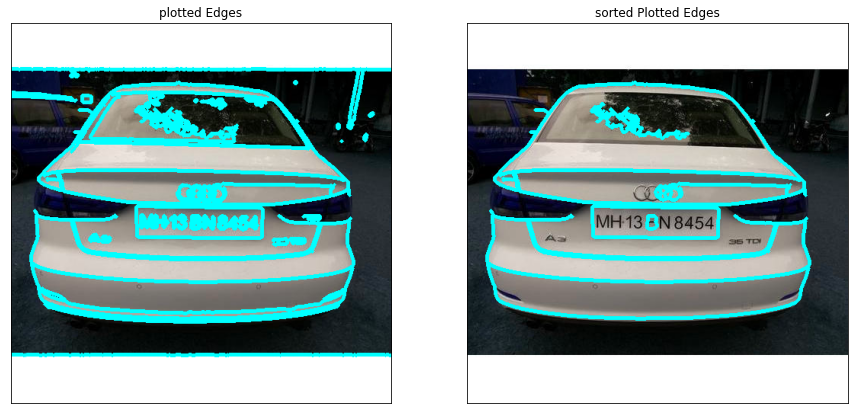

In [16]:
plot_images(contour_img, sorted_contour_img, "plotted Edges", "sorted Plotted Edges")

In [17]:
number_plate_img = None
for edge in sorted_edges:
    perimeter = cv2.arcLength(edge, True)
    no_of_edges = cv2.approxPolyDP(edge, 0.02*perimeter, True)
    if len(no_of_edges) == 4:
        x, y, w, h = cv2.boundingRect(edge)
        number_plate_img = orig_img[y:y+h, x:x+w]
        break

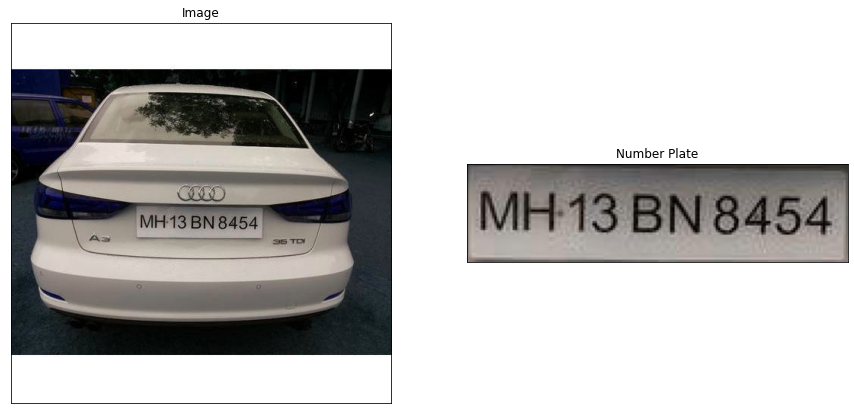

In [18]:
plot_images(orig_img, number_plate_img, "Image", "Number Plate")

In [19]:
noise_less_img = cv2.fastNlMeansDenoisingColored(number_plate_img,None,10,10,7,21)

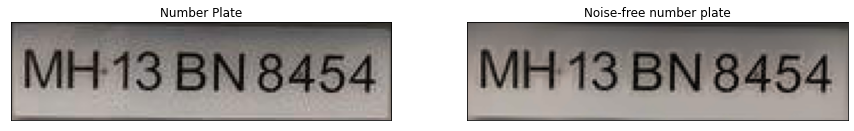

In [20]:
plot_images(number_plate_img, noise_less_img, "Number Plate", "Noise-free number plate")

In [21]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
print(pytesseract.image_to_string(noise_less_img, lang="eng"))

MH 13 BN 8454



In [22]:
cv2.imwrite("plate.jpg", noise_less_img)

True